# LAB 3A : Implement Simple Linear regression

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [3]:
# import Dataset
dataset = pd.read_csv("student_scores.csv")

## EDA Steps

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
# Dimension od Dataset 
dataset.shape

(25, 2)

In [15]:
# columns in dataset
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [16]:
# info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [17]:
# Description of Dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Preprocessing Steps

In [21]:
# Step 1 : Seprate i/p Independent Var and 
# o/p Dependent Var
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [22]:
print(X.head())

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5


In [23]:
print(Y.head())

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


In [24]:
# Step 4 : Split data into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split (X,Y, test_size = 0.2, random_state = 0)

In [25]:
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


## Create the Regression model on training data

In [39]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,Y_train)

LinearRegression()

In [40]:
# Justify linear Equation
print("Intercept B0 = ",regressor.intercept_)
print("Coefficient B1= ",regressor.coef_)

Intercept B0 =  2.0181600414346974
Coefficient B1=  [9.91065648]


From Above values our model regression line equation

**y = 2.0181600414346974 + 9.91065648 * X**


In [41]:
Y_new = 2.0181600414346974 + 9.91065648 * 9.8

print("Score after study 9.8 hrs = ", Y_new)

Score after study 9.8 hrs =  99.1425935454347


In [45]:
Y_pred = regressor.predict(X_test)

In [46]:
print(Y_pred)
print(Y_test)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


#### Accuracy of model

In [51]:
# Training Accuracy
print("Training accuracy =", regressor.score(X_train,Y_train))

Training accuracy = 0.9515510725211552


In [52]:
# Testing Accuracy
print("Testing accuracy =", regressor.score(X_test,Y_test))

Testing accuracy = 0.9454906892105355


### Visualizing the Model

#### 1. Visualize the training data

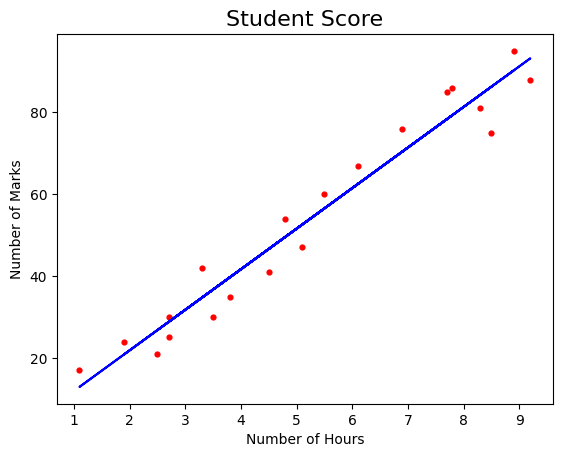

In [63]:
# Scatter Plot
plt.scatter(X_train,Y_train,color = 'red', s = 12)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Student Score", size= 16)
plt.xlabel("Number of Hours")
plt.ylabel("Number of Marks")
plt.show()

#### 2. Visualize the testing data

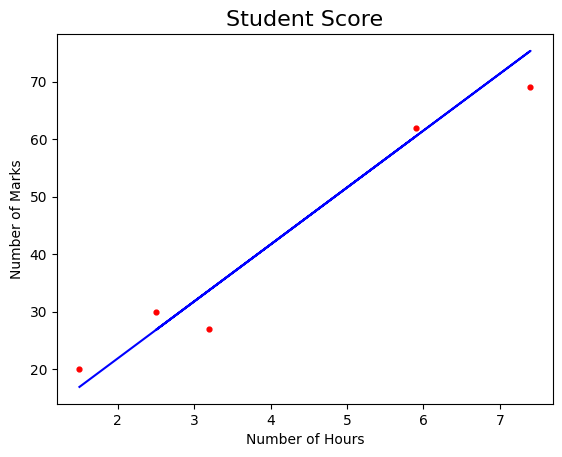

In [64]:
# Scatter Plot
plt.scatter(X_test,Y_test,color = 'red', s = 12)
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title("Student Score", size= 16)
plt.xlabel("Number of Hours")
plt.ylabel("Number of Marks")
plt.show()

#### Find R^2 Score of model

In [62]:
# fitting of model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9454906892105355